# Today's Date - 2 July
# Topic - Transfer Learning, using Kaggle Dataset of Cat, Dog classifier, with Data Augmentation

## Importing Dataset from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [ ]:
import zipfile

zip_path = '/content/dogs-vs-cats.zip'  # Replace with the actual path to your zip file

# Extract the contents of the zip file to the current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

## Data Augmentation

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-12-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 220s 335ms/step - loss: 0.2971 - accuracy: 0.8736 - val_loss: 0.2452 - val_accuracy: 0.8944
Epoch 2/10
625/625 [==============================] - 192s 307ms/step - loss: 0.2405 - accuracy: 0.8959 - val_loss: 0.2036 - val_accuracy: 0.9110
Epoch 3/10
625/625 [==============================] - 191s 306ms/step - loss: 0.2202 - accuracy: 0.9044 - val_loss: 0.2072 - val_accuracy: 0.9112
Epoch 4/10
625/625 [==============================] - 190s 304ms/step - loss: 0.2137 - accuracy: 0.9066 - val_loss: 0.2115 - val_accuracy: 0.9112
Epoch 5/10
625/625 [==============================] - 188s 301ms/step - loss: 0.1973 - accuracy: 0.9172 - val_loss: 0.1874 - val_accuracy: 0.9188
Epoch 6/10
625/625 [==============================] - 193s 309ms/step - loss: 0.1907 - accuracy: 0.9190 - val_loss: 0.1900 - val_accuracy: 0.9190
Epoch 7/10
625/625 [==============================] - 191s 306ms/step - loss: 0.1816 - accuracy: 0.9223 - val_loss: 0.2133 -

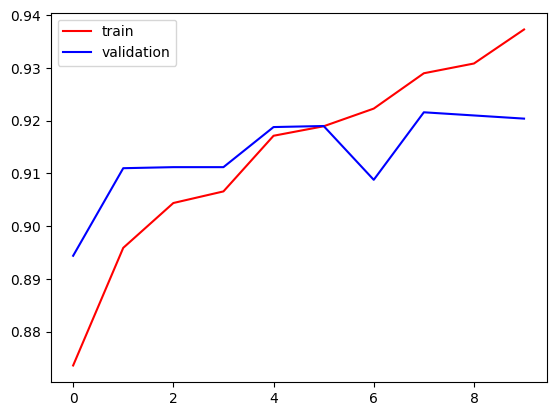

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

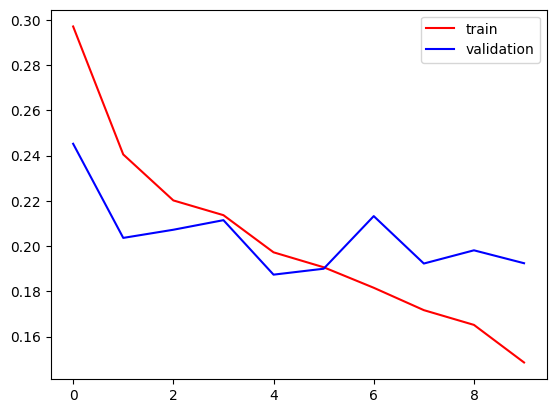

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
model.save('027-transfer-learning-feature-extraction-with-data-augmentation.h5')

# Load our model

In [1]:
import tensorflow as tf

model_path = '/content/027-transfer-learning-feature-extraction-with-data-augmentation.h5'
model = tf.keras.models.load_model(model_path)

# Lets test our model

In [4]:
import cv2
import matplotlib.pyplot as plt
def answer(input_image):
  plt.imshow(input_image)
  pic = cv2.resize(input_image, (150,150))
  img = pic.reshape((1,150,150,3))
  preds = model.predict(img)
  ans = int(preds)
  print(preds)
  if ans:
    print("It's a dog")
  else:
    print("It's a cat")

1/1 [==============================] - 8s 8s/step
[[1.]]
It's a dog


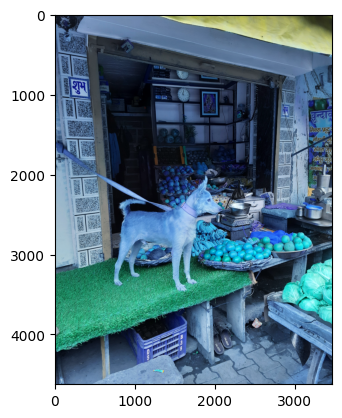

In [5]:
test_img1 = cv2.imread('/content/1.jpg')
answer(test_img1)

1/1 [==============================] - 0s 185ms/step
[[0.]]
It's a cat


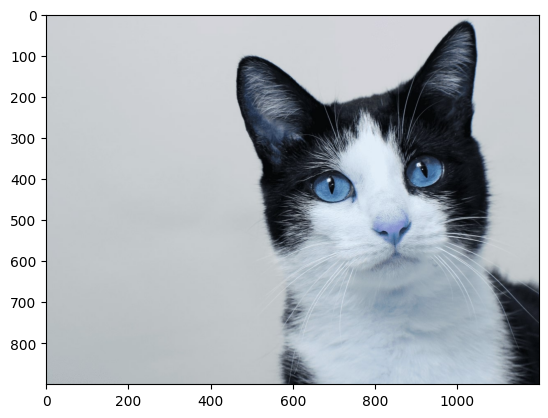

In [6]:
test_img8 = cv2.imread('/content/8.jpg')
answer(test_img8)

1/1 [==============================] - 0s 20ms/step
[[1.]]
It's a dog


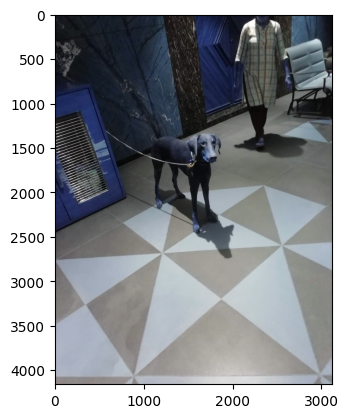

In [7]:
test_img3 = cv2.imread('/content/3.jpg')
answer(test_img3)

1/1 [==============================] - 0s 40ms/step
[[1.]]
It's a dog


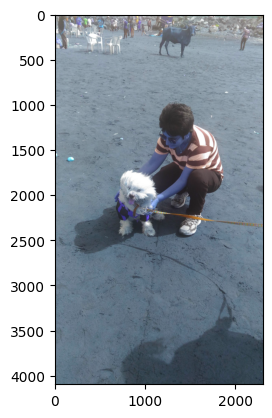

In [8]:
test_img4 = cv2.imread('/content/4.jpg')
answer(test_img4)

1/1 [==============================] - 0s 18ms/step
[[8.560832e-08]]
It's a cat


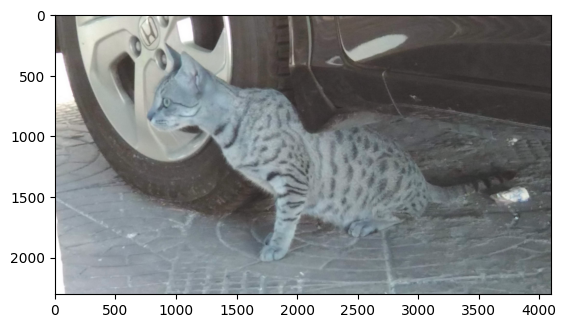

In [9]:
test_img5 = cv2.imread('/content/5.jpg')
answer(test_img5)

1/1 [==============================] - 0s 20ms/step
[[1.]]
It's a dog


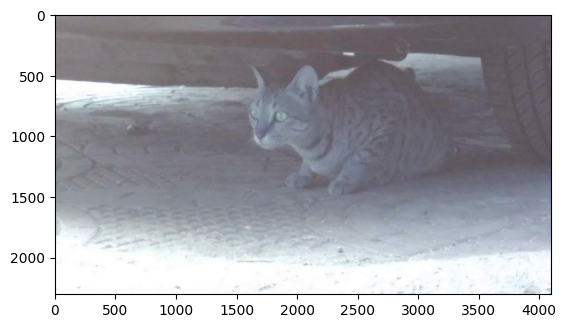

In [10]:
test_img6 = cv2.imread('/content/6.jpg')
answer(test_img6)

1/1 [==============================] - 0s 19ms/step
[[1.]]
It's a dog


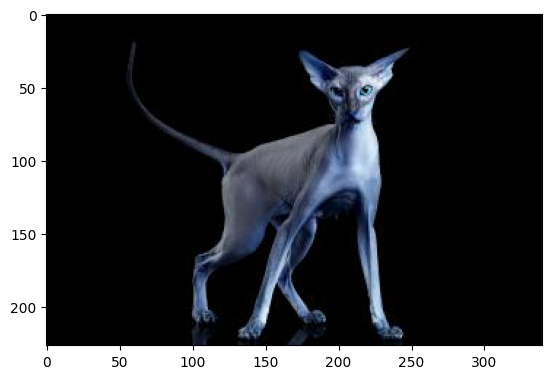

In [11]:
test_img7 = cv2.imread('/content/7.jpg')
answer(test_img7)

1/1 [==============================] - 0s 55ms/step
[[1.]]
It's a dog


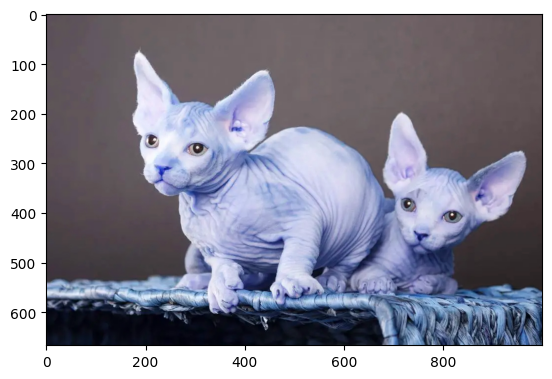

In [12]:
test_img9 = cv2.imread('/content/9.jpg')
answer(test_img9)

1/1 [==============================] - 0s 83ms/step
[[1.]]
It's a dog


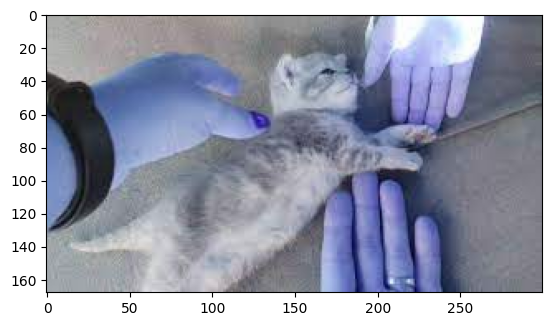

In [14]:
test_img10 = cv2.imread('/content/10.jpeg')
answer(test_img10)

1/1 [==============================] - 0s 19ms/step
[[1.]]
It's a dog


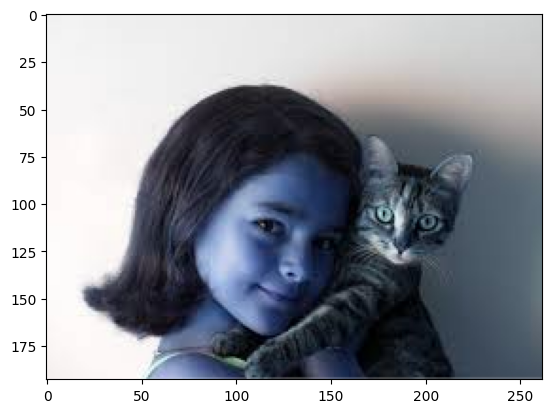

In [15]:
test_img11 = cv2.imread('/content/11.jpeg')
answer(test_img11)

1/1 [==============================] - 0s 20ms/step
[[0.]]
It's a cat


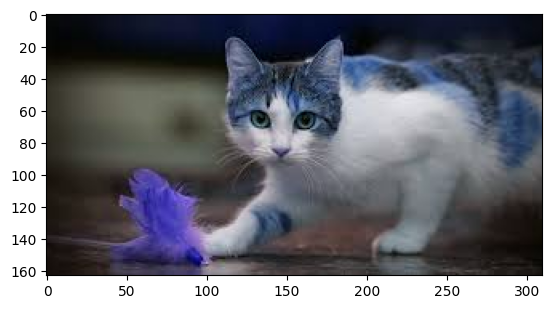

In [16]:
test_img12 = cv2.imread('/content/12.jpeg')
answer(test_img12)

1/1 [==============================] - 0s 33ms/step
[[1.]]
It's a dog


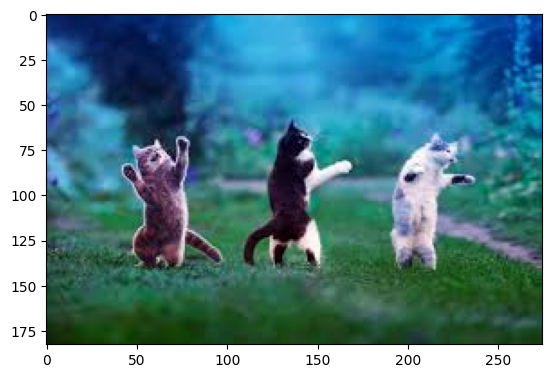

In [17]:
test_img13 = cv2.imread('/content/13.jpeg')
answer(test_img13)

1/1 [==============================] - 0s 28ms/step
[[8.4995536e-32]]
It's a cat


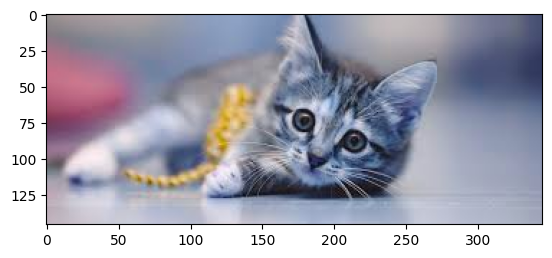

In [18]:
test_img14 = cv2.imread('/content/14.jpeg')
answer(test_img14)

1/1 [==============================] - 0s 31ms/step
[[1.900188e-22]]
It's a cat


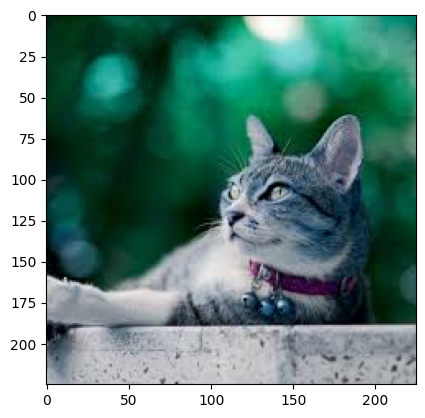

In [19]:
test_img15 = cv2.imread('/content/15.jpeg')
answer(test_img15)

1/1 [==============================] - 0s 18ms/step
[[1.]]
It's a dog


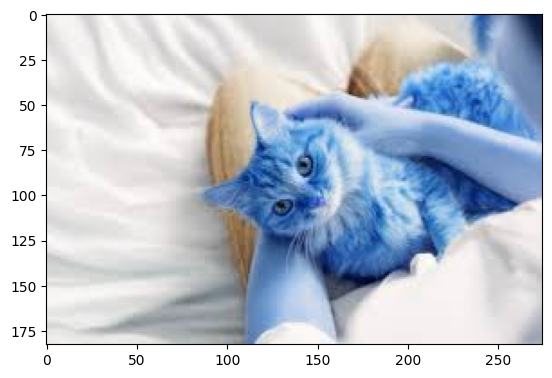

In [20]:
test_img16 = cv2.imread('/content/16.jpeg')
answer(test_img16)